<a href="https://colab.research.google.com/github/amirrhseiin/Fraud-Detection/blob/main/without_identity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip 'drive/MyDrive/project3/Proj3(1).zip'

Archive:  drive/MyDrive/project3/Proj3(1).zip
replace Proj3/test_identity.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Proj3/train_identity.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Proj3/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Proj3/train_transaction.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Proj3/test_transaction.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import pandas as pd
from keras.callbacks import ReduceLROnPlateau
from sklearn import preprocessing 
import numpy as np
import matplotlib.pyplot as plt
from keras import Model
from keras.models import load_model
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D, Flatten, Dense, Dropout, Activation , Concatenate, Input , BatchNormalization
from keras.optimizers import SGD, Adam
from keras import Model
import random
from keras.models import load_model
from keras.utils import to_categorical, plot_model
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
#sample_submission = pd.read_csv('Proj3/sample_submission.csv')
#test_identity = pd.read_csv('Proj3/test_identity.csv')
test_transaction = pd.read_csv('Proj3/test_transaction.csv')
#train_identity = pd.read_csv('Proj3/train_identity.csv')
train_transaction =pd.read_csv('Proj3/train_transaction.csv')

In [ ]:
drop_columns=[]
null_percent=train_transaction.isnull().sum()*100/590540
for i,j in enumerate(null_percent):
  if(j>50):
    drop_columns.append(i)

In [ ]:
len(drop_columns)

174

In [ ]:
drop_columns_name=[]
for i in drop_columns:
  drop_columns_name.append(train_transaction.columns[i])

In [ ]:
#for i in drop_columns_name:
  #train_transaction.iloc[ : , 4 ]
  #print(train_transaction.columns[i])
train_transaction.drop(columns=drop_columns_name, inplace=True)

In [ ]:
train_transaction=train_transaction.drop(['TransactionID','ProductCD'],axis=1)

In [ ]:
train_transaction

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D10,D11,D15,M1,M2,M3,M4,M6,V1,V2,...,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,0,86400,68.50,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,13.0,13.0,0.0,T,T,T,M2,T,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000
1,0,86401,29.00,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,gmail.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,M0,T,NaN,NaN,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,0,86469,59.00,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,outlook.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,0.0,315.0,315.0,T,T,T,M0,F,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,0,86499,50.00,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,yahoo.com,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,84.0,NaN,111.0,NaN,NaN,NaN,M0,F,NaN,NaN,...,0.0,0.0,0.0,10.0,0.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0,38.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.000000,1758.000000,925.000000,0.0,354.000000,0.0,135.0,0.000000,0.000000,0.000000,50.0,1404.0,790.0,0.000000,0.000000,0.000000
4,0,86506,50.00,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,gmail.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,0,15811047,49.00,6550,NaN,150.0,visa,226.0,debit,272.0,87.0,NaN,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,3.0,2.0,29.0,29.0,30.0,NaN,56.0,56.0,56.0,T,T,T,M0,F,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.0,47.950001,0.0,0.0,47.950001,47.950001,47.950001,0.0,0.0,0.0,0.000000,0.000000,0.000000
590536,0,15811049,39.50,10444,225.0,150.0,mastercard,224.0,debit,204.0,87.0,gmail.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,T,F,F,M0,T,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590537,0,15811079,30.95,12037,595.0,150.0,mastercard,224.0,debit,231.0,87.0,gmail.com,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,T,F,F,NaN,T,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590538,0,15811088,117.00,7826,481.0,150.0,master

In [ ]:
nulls_before = train_transaction.isnull().sum()
nulls_before[nulls_before > 0]

card2    8933
card3    1565
card4    1577
card5    4259
card6    1571
         ... 
V317       12
V318       12
V319       12
V320       12
V321       12
Length: 200, dtype: int64

In [ ]:
train_transaction.fillna(train_transaction.mean(), inplace=True)
train_transaction

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D10,D11,D15,M1,M2,M3,M4,M6,V1,V2,...,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,0,86400,68.50,13926,362.555488,150.0,discover,142.0,credit,315.0,87.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,169.563231,13.000000,140.002441,13.000000,13.000000,0.000000,T,T,T,M2,T,1.000000,1.000000,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000
1,0,86401,29.00,2755,404.000000,150.0,mastercard,102.0,credit,325.0,87.0,gmail.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,169.563231,28.343348,0.000000,0.000000,146.621465,0.000000,NaN,NaN,NaN,M0,T,0.999945,1.045204,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,0,86469,59.00,4663,490.000000,150.0,visa,166.0,debit,330.0,87.0,outlook.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,169.563231,28.343348,0.000000,0.000000,315.000000,315.000000,T,T,T,M0,F,1.000000,1.000000,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,0,86499,50.00,18132,567.000000,150.0,mastercard,117.0,debit,476.0,87.0,yahoo.com,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.000000,0.000000,94.000000,84.000000,146.621465,111.000000,NaN,NaN,NaN,M0,F,0.999945,1.045204,...,0.0,0.0,0.0,10.0,0.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0,38.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.000000,1758.000000,925.000000,0.0,354.000000,0.0,135.0,0.000000,0.000000,0.000000,50.0,1404.0,790.0,0.000000,0.000000,0.000000
4,0,86506,50.00,4497,514.000000,150.0,mastercard,102.0,credit,420.0,87.0,gmail.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,169.563231,28.343348,140.002441,123.982137,146.621465,163.744579,NaN,NaN,NaN,NaN,NaN,0.999945,1.045204,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,0,15811047,49.00,6550,362.555488,150.0,visa,226.0,debit,272.0,87.0,NaN,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,3.0,2.0,29.0,29.000000,30.000000,140.002441,56.000000,56.000000,56.000000,T,T,T,M0,F,1.000000,1.000000,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.0,47.950001,0.0,0.0,47.950001,47.950001,47.950001,0.0,0.0,0.0,0.000000,0.000000,0.000000
590536,0,15811049,39.50,10444,225.000000,150.0,mastercard,224.0,debit,204.0,87.0,gmail.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,169.563231,28.343348,0.000000,0.000000,0.000000,0.000000,T,F,F,M0,T,1.000000,1.000000,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590537,0,15811079,30.95,12037,595.000000,150.0,mastercard,224.0,debit,231.0,87.0,gmail.com,1.0,1.0,0.0,

In [ ]:
nulls_after = train_transaction.isnull().sum()
nulls_after[nulls_after > 0]

card4              1577
card6              1571
P_emaildomain     94456
M1               271100
M2               271100
M3               271100
M4               281444
M6               169360
dtype: int64

In [ ]:
train_transaction.card4.value_counts(normalize=True)*100

visa                65.329571
mastercard          32.127146
american express     1.414011
discover             1.129273
Name: card4, dtype: float64

In [ ]:
train_transaction.card6.value_counts(normalize=True)*100

debit              74.696291
credit             25.296068
debit or credit     0.005094
charge card         0.002547
Name: card6, dtype: float64

In [ ]:
train_transaction.P_emaildomain.value_counts(normalize=True)*100

gmail.com           46.031519
yahoo.com           20.346151
hotmail.com          9.121439
anonymous.com        7.458011
aol.com              5.702462
comcast.net          1.590053
icloud.com           1.263294
outlook.com          1.027245
msn.com              0.824860
att.net              0.812967
live.com             0.613001
sbcglobal.net        0.598689
verizon.net          0.545271
ymail.com            0.482983
bellsouth.net        0.384814
yahoo.com.mx         0.311036
me.com               0.306803
cox.net              0.280799
optonline.net        0.203796
charter.net          0.164488
live.com.mx          0.150982
rocketmail.com       0.133848
mail.com             0.112683
earthlink.net        0.103611
gmail                0.099983
outlook.es           0.088291
mac.com              0.087888
juno.com             0.064908
aim.com              0.063497
windstream.net       0.061482
hotmail.es           0.061482
roadrunner.com       0.061482
hotmail.fr           0.059466
frontier.c

In [ ]:
train_transaction.M1.value_counts(normalize=True)*100

T    99.992174
F     0.007826
Name: M1, dtype: float64

In [ ]:
train_transaction.M2.value_counts(normalize=True)*100

T    89.365139
F    10.634861
Name: M2, dtype: float64

In [ ]:
train_transaction.M3.value_counts(normalize=True)*100

T    78.803844
F    21.196156
Name: M3, dtype: float64

In [ ]:
train_transaction.M4.value_counts(normalize=True)*100

M0    63.541748
M2    19.367769
M1    17.090483
Name: M4, dtype: float64

In [ ]:
train_transaction.M6.value_counts(normalize=True)*100

F    54.099435
T    45.900565
Name: M6, dtype: float64

In [ ]:
train_transaction.M1.fillna('T', inplace=True)
train_transaction.M2.fillna('T', inplace=True)
train_transaction.M3.fillna('T', inplace=True)
train_transaction.M4.fillna('M0', inplace=True)
train_transaction.M6.fillna(method='ffill', inplace=True)
train_transaction.P_emaildomain.fillna('gmail.com', inplace=True)
train_transaction.card6.fillna('debit', inplace=True)
train_transaction.card4.fillna('visa', inplace=True)

In [ ]:
count=train_transaction.isnull().sum()
count[count>0]

Series([], dtype: int64)

In [ ]:
train_transaction.M6.value_counts(normalize=True)*100

F    54.069157
T    45.930843
Name: M6, dtype: float64

In [ ]:
train_transaction.select_dtypes(include=['object'])

,card4,card6,P_emaildomain,M1,M2,M3,M4,M6
0,discover,credit,gmail.com,T,T,T,M2,T
1,mastercard,credit,gmail.com,T,T,T,M0,T
2,visa,debit,outlook.com,T,T,T,M0,F
3,mastercard,debit,yahoo.com,T,T,T,M0,F
4,mastercard,credit,gmail.com,T,T,T,M0,F
...,...,...,...,...,...,...,...,...
590535,visa,debit,gmail.com,T,T,T,M0,F
590536,mastercard,debit,gmail.com,T,F,F,M0,T
590537,mastercard,debit,gmail.com,T,F,F,M0,T
590538,mastercard,debit,aol.com,T,T,T,M0,T


In [ ]:
label_encoder = preprocessing.LabelEncoder() 
new_card4 = pd.Series(label_encoder.fit_transform(train_transaction.card4))
new_card6 = pd.Series(label_encoder.fit_transform(train_transaction.card6))
new_P_emaildomain = pd.Series(label_encoder.fit_transform(train_transaction.P_emaildomain))
new_M1=pd.Series(label_encoder.fit_transform(train_transaction.M1))
new_M2=pd.Series(label_encoder.fit_transform(train_transaction.M2))
new_M3=pd.Series(label_encoder.fit_transform(train_transaction.M3))
new_M4=pd.Series(label_encoder.fit_transform(train_transaction.M4))
new_M6=pd.Series(label_encoder.fit_transform(train_transaction.M6))

train_transaction=train_transaction.drop(['M1','M2','M3','M4','M6','P_emaildomain','card6','card4'],axis=1)

In [ ]:
col_names=[]
col_names = train_transaction.columns
col_names

Index(['isFraud', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3',
       'card5', 'addr1', 'addr2', 'C1',
       ...
       'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320',
       'V321'],
      dtype='object', length=210)

In [ ]:
train_transaction=pd.concat([train_transaction,new_M1,new_M2,new_M3,new_M4,new_M6,new_P_emaildomain,new_card6,new_card4],axis=1)

In [ ]:
train_transaction

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D10,D11,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,0,1,2,3,4,5,6,7
0,0,86400,68.50,13926,362.555488,150.0,142.0,315.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,169.563231,13.000000,140.002441,13.000000,13.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000,1,1,1,2,1,16,1,1
1,0,86401,29.00,2755,404.000000,150.0,102.0,325.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,169.563231,28.343348,0.000000,0.000000,146.621465,0.000000,0.999945,1.045204,1.078075,0.846456,0.876991,1.045686,1.07287,1.027704,1.041529,0.463915,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,1,1,1,0,1,16,1,2
2,0,86469,59.00,4663,490.000000,150.0,166.0,330.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,169.563231,28.343348,0.000000,0.000000,315.000000,315.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,1,1,1,0,0,35,2,3
3,0,86499,50.00,18132,567.000000,150.0,117.0,476.0,87.0,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.000000,0.000000,94.000000,84.000000,146.621465,111.000000,0.999945,1.045204,1.078075,0.846456,0.876991,1.045686,1.07287,1.027704,1.041529,0.463915,...,1.0,1.0,1.0,1.0,38.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.000000,1758.000000,925.000000,0.0,354.000000,0.0,135.0,0.000000,0.000000,0.000000,50.0,1404.0,790.0,0.000000,0.000000,0.000000,1,1,1,0,0,53,2,2
4,0,86506,50.00,4497,514.000000,150.0,102.0,420.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,169.563231,28.343348,140.002441,123.982137,146.621465,163.744579,0.999945,1.045204,1.078075,0.846456,0.876991,1.045686,1.07287,1.027704,1.041529,0.463915,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,1,1,1,0,0,16,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,0,15811047,49.00,6550,362.555488,150.0,226.0,272.0,87.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,3.0,2.0,29.0,29.000000,30.000000,140.002441,56.000000,56.000000,56.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.0,47.950001,0.0,0.0,47.950001,47.950001,47.950001,0.0,0.0,0.0,0.000000,0.000000,0.000000,1,1,1,0,0,16,2,3
590536,0,15811049,39.50,10444,225.000000,150.0,224.0,204.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,169.563231,28.343348,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,1,0,0,0,1,16,2,2
590537,0,15811079,

In [ ]:
col_name_list=col_names.tolist()
col_name_list.append('M1')
col_name_list.append('M2')
col_name_list.append('M3')
col_name_list.append('M4')
col_name_list.append('M6')
col_name_list.append('P_emaildomain')
col_name_list.append('card6')
col_name_list.append('card4')

In [ ]:
train_transaction.columns=col_name_list

In [ ]:
train_transaction

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D10,D11,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,M1,M2,M3,M4,M6,P_emaildomain,card6,card4
0,0,86400,68.50,13926,362.555488,150.0,142.0,315.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,169.563231,13.000000,140.002441,13.000000,13.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000,1,1,1,2,1,16,1,1
1,0,86401,29.00,2755,404.000000,150.0,102.0,325.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,169.563231,28.343348,0.000000,0.000000,146.621465,0.000000,0.999945,1.045204,1.078075,0.846456,0.876991,1.045686,1.07287,1.027704,1.041529,0.463915,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,1,1,1,0,1,16,1,2
2,0,86469,59.00,4663,490.000000,150.0,166.0,330.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,169.563231,28.343348,0.000000,0.000000,315.000000,315.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,1,1,1,0,0,35,2,3
3,0,86499,50.00,18132,567.000000,150.0,117.0,476.0,87.0,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.000000,0.000000,94.000000,84.000000,146.621465,111.000000,0.999945,1.045204,1.078075,0.846456,0.876991,1.045686,1.07287,1.027704,1.041529,0.463915,...,1.0,1.0,1.0,1.0,38.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.000000,1758.000000,925.000000,0.0,354.000000,0.0,135.0,0.000000,0.000000,0.000000,50.0,1404.0,790.0,0.000000,0.000000,0.000000,1,1,1,0,0,53,2,2
4,0,86506,50.00,4497,514.000000,150.0,102.0,420.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,169.563231,28.343348,140.002441,123.982137,146.621465,163.744579,0.999945,1.045204,1.078075,0.846456,0.876991,1.045686,1.07287,1.027704,1.041529,0.463915,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,1,1,1,0,0,16,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,0,15811047,49.00,6550,362.555488,150.0,226.0,272.0,87.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,3.0,2.0,29.0,29.000000,30.000000,140.002441,56.000000,56.000000,56.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.0,47.950001,0.0,0.0,47.950001,47.950001,47.950001,0.0,0.0,0.0,0.000000,0.000000,0.000000,1,1,1,0,0,16,2,3
590536,0,15811049,39.50,10444,225.000000,150.0,224.0,204.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,169.563231,28.343348,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,1,0,0,0,1,

In [ ]:
maxlist=[]
maxlist=train_transaction.max()

for i in range(len(train_transaction.columns)):
  train_transaction.iloc[:,i]=train_transaction.iloc[:,i]/maxlist[i]

In [ ]:
train_transaction

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D10,D11,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,M1,M2,M3,M4,M6,P_emaildomain,card6,card4
0,0.0,0.005465,0.002145,0.757012,0.604259,0.649351,0.599156,0.583333,0.852941,0.000213,0.000176,0.0,0.0,0.000000,0.000444,0.0,0.0000,0.004762,0.000000,0.000627,0.000000,0.000343,0.0007,0.021875,0.264943,0.015873,0.161108,0.014840,0.019403,0.000000,1.000000,0.125000,0.111111,0.166667,0.166667,0.111111,0.111111,0.125000,0.125000,0.000000,...,0.014925,0.000948,0.003096,0.000000,0.000778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.00,0.0000,0.5,0.000000,0.000803,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000873,0.000000,0.00000,0.00000,0.00000,1.0,1.0,1.0,1.0,1.0,0.275862,0.333333,0.333333
1,0.0,0.005465,0.000908,0.149761,0.673333,0.649351,0.430380,0.601852,0.852941,0.000213,0.000176,0.0,0.0,0.000000,0.000444,0.0,0.0000,0.000000,0.000000,0.000314,0.000000,0.000343,0.0007,0.000000,0.264943,0.034607,0.000000,0.000000,0.218838,0.000000,0.999945,0.130651,0.119786,0.141076,0.146165,0.116187,0.119208,0.128463,0.130191,0.115979,...,0.014925,0.000948,0.003096,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.00,0.0000,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,1.0,1.0,1.0,0.0,1.0,0.275862,0.333333,0.666667
2,0.0,0.005469,0.001847,0.253479,0.816667,0.649351,0.700422,0.611111,0.852941,0.000213,0.000176,0.0,0.0,0.000000,0.000444,0.0,0.0000,0.004762,0.000000,0.000314,0.000000,0.000343,0.0007,0.000000,0.264943,0.034607,0.000000,0.000000,0.470149,0.358362,1.000000,0.125000,0.111111,0.166667,0.166667,0.111111,0.111111,0.125000,0.125000,0.000000,...,0.014925,0.000948,0.003096,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.00,0.0000,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,1.0,1.0,1.0,0.0,0.0,0.603448,0.666667,1.000000
3,0.0,0.005471,0.001566,0.985649,0.945000,0.649351,0.493671,0.881481,0.852941,0.000427,0.000879,0.0,0.0,0.000000,0.001775,0.0,0.0000,0.004762,0.000000,0.000314,0.000000,0.008568,0.0007,0.175000,0.175000,0.000000,0.108170,0.095890,0.218838,0.126280,0.999945,0.130651,0.119786,0.141076,0.146165,0.116187,0.119208,0.128463,0.130191,0.115979,...,0.014925,0.000948,0.003096,0.001151,0.029549,0.025862,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.00,0.0000,0.5,0.000460,0.012061,0.008502,0.000000,0.006422,0.0,0.002449,0.000000,0.000000,0.000000,0.000533,0.010476,0.008022,0.00000,0.00000,0.00000,1.0,1.0,1.0,0.0,0.0,0.913793,0.666667,0.666667
4,0.0,0.005471,0.001566,0.244455,0.856667,0.649351,0.430380,0.777778,0.852941,0.000213,0.000176,0.0,0.0,0.000000,0.000444,0.0,0.0003,0.000000,0.000307,0.000314,0.000000,0.000343,0.0007,0.000000,0.264943,0.034607,0.161108,0.141532,0.218838,0.186285,0.999945,0.130651,0.119786,0.141076,0.146165,0.116187,0.119208,0.128463,0.130191,0.115979,...,0.014925,0.000948,0.003096,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0625,0.05,0.0625,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,1.0,1.0,1.0,0.0,0.0,0.275862,0.333333,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,0.0,

In [ ]:
train_label=train_transaction.isFraud
train_transaction.drop('isFraud', axis=1,inplace=True)

Test data 


In [ ]:
test_col_names = test_transaction.columns.tolist()
test_drop_col_name =[]

for name in test_col_names:
  if name not in col_name_list:
    test_drop_col_name.append(name)

In [ ]:
len(test_drop_col_name)

176

In [ ]:
test_transaction.drop(columns=test_drop_col_name, inplace=True)

In [ ]:

test_transaction

,TransactionDT,TransactionAmt,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D10,D11,D15,M1,M2,M3,M4,M6,V1,V2,V3,...,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,18403224,31.950,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,gmail.com,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,418.0,203.0,409.0,T,T,F,NaN,F,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,18403263,49.000,4272,111.0,150.0,visa,226.0,debit,299.0,87.0,aol.com,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,231.0,634.0,634.0,T,F,F,M0,F,1.0,1.0,1.0,...,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,280.000000,77.000000,0.000000,280.000000,0.000000,77.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,18403310,171.000,4476,574.0,150.0,visa,226.0,debit,472.0,87.0,hotmail.com,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,136.0,136.0,97.0,T,T,F,M0,F,1.0,1.0,1.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1321.000000,0.000000,0.000000,1058.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,263.0,0.0
3,18403310,284.950,10989,360.0,150.0,visa,166.0,debit,205.0,87.0,gmail.com,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,242.0,242.0,242.0,T,T,T,NaN,T,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.540009,282.540009,282.540009,0.0,0.0,0.0,0.0,0.0,0.0
4,18403317,67.950,18018,452.0,150.0,mastercard,117.0,debit,264.0,87.0,gmail.com,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,22.0,22.0,22.0,T,T,T,NaN,F,1.0,1.0,1.0,...,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,67.949997,183.850006,67.949997,67.949997,183.850006,67.949997,67.949997,67.949997,183.850006,67.949997,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,34214279,94.679,13832,375.0,185.0,mastercard,224.0,debit,284.0,60.0,gmail.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,M2,NaN,NaN,NaN,NaN,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
506687,34214287,12.173,3154,408.0,185.0,mastercard,224.0,debit,NaN,NaN,hotmail.com,1.0,3.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,2.0,1.0,1.0,3.0,1.0,16.0,16.0,16.0,16.0,0.0,NaN,16.0,NaN,NaN,NaN,M2,NaN,NaN,NaN,NaN,...,2.0,2.0,0.0,2.0,0.0,0.0,2.0,2.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.000000,31.723700,0.000000,0.000000,31.723700,0.000000,0.000000,31.723700,31.723700,31.723700,0.0,0.0,0.0,0.0,0.0,0.0
506688,34214326,49.000,16661,490.0,150.0,visa,226.0,debit,327.0,87.0,hotmail.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,T,T,T,M0,F,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [ ]:
test_transaction.fillna(test_transaction.mean(), inplace=True)
test_transaction

,TransactionDT,TransactionAmt,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D10,D11,D15,M1,M2,M3,M4,M6,V1,V2,V3,...,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,18403224,31.950,10409,111.0,150.0,visa,226.0,debit,170.000000,87.000000,gmail.com,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.000000,27.000000,398.0,418.0,203.000000,409.0,T,T,F,NaN,F,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,18403263,49.000,4272,111.0,150.0,visa,226.0,debit,299.000000,87.000000,aol.com,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.000000,7.000000,634.0,231.0,634.000000,634.0,T,F,F,M0,F,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,280.000000,77.000000,0.000000,280.000000,0.000000,77.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,18403310,171.000,4476,574.0,150.0,visa,226.0,debit,472.000000,87.000000,hotmail.com,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.000000,10.000000,97.0,136.0,136.000000,97.0,T,T,F,M0,F,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1321.000000,0.000000,0.000000,1058.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,263.0,0.0
3,18403310,284.950,10989,360.0,150.0,visa,166.0,debit,205.000000,87.000000,gmail.com,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.000000,41.000000,242.0,242.0,242.000000,242.0,T,T,T,NaN,T,1.000000,1.000000,1.000000,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.540009,282.540009,282.540009,0.0,0.0,0.0,0.0,0.0,0.0
4,18403317,67.950,18018,452.0,150.0,mastercard,117.0,debit,264.000000,87.000000,gmail.com,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.000000,0.000000,22.0,22.0,22.000000,22.0,T,T,T,NaN,F,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,67.949997,183.850006,67.949997,67.949997,183.850006,67.949997,67.949997,67.949997,183.850006,67.949997,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,34214279,94.679,13832,375.0,185.0,mastercard,224.0,debit,284.000000,60.000000,gmail.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,188.666621,33.394727,0.0,0.0,218.414895,0.0,NaN,NaN,NaN,M2,NaN,0.999997,1.046636,1.087436,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
506687,34214287,12.173,3154,408.0,185.0,mastercard,224.0,debit,291.846514,86.723412,hotmail.com,1.0,3.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,2.0,1.0,1.0,3.0,1.0,16.0,16.000000,16.000000,16.0,0.0,218.414895,16.0,NaN,NaN,NaN,M2,NaN,0.999997,1.046636,1.087436,...,2.0,2.0,0.0,2.0,0.0,0.0,2.0,2.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.000000,31.723700,0.000000,0.000000,31.723700,0.000000,0.000000,31.723700,31.723700,31.723700,0.0,0.0,0.0,0.0,0.0,0.0
506688,34214326,49.000,16661,490.0,150.0,visa,226.0,debit,327.000000,87.000000

In [ ]:
nulls_after = test_transaction.isnull().sum()
nulls_after[nulls_after > 0]

card4              3086
card6              3007
P_emaildomain     69192
M1               176639
M2               176639
M3               176639
M4               237745
M6               158939
dtype: int64

In [ ]:
test_transaction.P_emaildomain.value_counts(normalize=True)*100

gmail.com           47.416794
yahoo.com           18.708614
hotmail.com          9.234078
anonymous.com        7.786075
aol.com              5.496698
comcast.net          1.505375
icloud.com           1.382632
outlook.com          1.105831
att.net              0.826059
msn.com              0.774402
sbcglobal.net        0.639316
live.com             0.612344
verizon.net          0.527087
ymail.com            0.383772
bellsouth.net        0.349258
yahoo.com.mx         0.293486
cox.net              0.288915
me.com               0.272229
optonline.net        0.211658
live.com.mx          0.164800
charter.net          0.143315
mail.com             0.136457
gmail                0.113600
earthlink.net        0.106286
rocketmail.com       0.100800
mac.com              0.097372
outlook.es           0.097143
hotmail.fr           0.086629
hotmail.es           0.073600
frontier.com         0.071772
web.de               0.063543
roadrunner.com       0.063543
juno.com             0.057600
windstream

In [ ]:
test_transaction.M1.value_counts(normalize=True)*100

T    99.990608
F     0.009392
Name: M1, dtype: float64

In [ ]:
test_transaction.M2.value_counts(normalize=True)*100

T    91.759783
F     8.240217
Name: M2, dtype: float64

In [ ]:
test_transaction.M3.value_counts(normalize=True)*100

T    80.748791
F    19.251209
Name: M3, dtype: float64

In [ ]:
test_transaction.M4.value_counts(normalize=True)*100

M0    60.006098
M2    23.455266
M1    16.538636
Name: M4, dtype: float64

In [ ]:
test_transaction.M6.value_counts(normalize=True)*100

F    55.090122
T    44.909878
Name: M6, dtype: float64

In [ ]:
test_transaction.card4.value_counts(normalize=True)*100

visa                66.496957
mastercard          31.407353
american express     1.525203
discover             0.570487
Name: card4, dtype: float64

In [ ]:
test_transaction.card6.value_counts(normalize=True)*100

debit          76.440983
credit         23.558819
charge card     0.000199
Name: card6, dtype: float64

In [ ]:
test_transaction.M6.fillna(method='ffill', inplace=True)
test_transaction.M1.fillna('T', inplace=True)
test_transaction.M2.fillna('T' , inplace=True)
test_transaction.M3.fillna('T' , inplace=True)
test_transaction.M4.fillna('M0' , inplace=True)
test_transaction.P_emaildomain.fillna('gmail.com', inplace=True)
test_transaction.card6.fillna('debit', inplace=True)
test_transaction.card4.fillna('visa', inplace=True)

In [ ]:
nulls_before = test_transaction.isnull().sum()
nulls_before[nulls_before > 0]


Series([], dtype: int64)

In [ ]:
test_transaction.M6.value_counts(normalize=True)*100

F    55.153338
T    44.846662
Name: M6, dtype: float64

null tmum shde

In [ ]:
test_transaction.select_dtypes(include=['object'])

,card4,card6,P_emaildomain,M1,M2,M3,M4,M6
0,visa,debit,gmail.com,T,T,F,M0,F
1,visa,debit,aol.com,T,F,F,M0,F
2,visa,debit,hotmail.com,T,T,F,M0,F
3,visa,debit,gmail.com,T,T,T,M0,T
4,mastercard,debit,gmail.com,T,T,T,M0,F
...,...,...,...,...,...,...,...,...
506686,mastercard,debit,gmail.com,T,T,T,M2,T
506687,mastercard,debit,hotmail.com,T,T,T,M2,T
506688,visa,debit,hotmail.com,T,T,T,M0,F
506689,mastercard,debit,hotmail.com,T,T,T,M0,F


In [ ]:
test_transaction

,TransactionDT,TransactionAmt,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D10,D11,D15,M1,M2,M3,M4,M6,V1,V2,V3,...,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,18403224,31.950,10409,111.0,150.0,visa,226.0,debit,170.000000,87.000000,gmail.com,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.000000,27.000000,398.0,418.0,203.000000,409.0,T,T,F,M0,F,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,18403263,49.000,4272,111.0,150.0,visa,226.0,debit,299.000000,87.000000,aol.com,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.000000,7.000000,634.0,231.0,634.000000,634.0,T,F,F,M0,F,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,280.000000,77.000000,0.000000,280.000000,0.000000,77.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,18403310,171.000,4476,574.0,150.0,visa,226.0,debit,472.000000,87.000000,hotmail.com,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.000000,10.000000,97.0,136.0,136.000000,97.0,T,T,F,M0,F,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1321.000000,0.000000,0.000000,1058.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,263.0,0.0
3,18403310,284.950,10989,360.0,150.0,visa,166.0,debit,205.000000,87.000000,gmail.com,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.000000,41.000000,242.0,242.0,242.000000,242.0,T,T,T,M0,T,1.000000,1.000000,1.000000,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.540009,282.540009,282.540009,0.0,0.0,0.0,0.0,0.0,0.0
4,18403317,67.950,18018,452.0,150.0,mastercard,117.0,debit,264.000000,87.000000,gmail.com,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.000000,0.000000,22.0,22.0,22.000000,22.0,T,T,T,M0,F,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,67.949997,183.850006,67.949997,67.949997,183.850006,67.949997,67.949997,67.949997,183.850006,67.949997,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,34214279,94.679,13832,375.0,185.0,mastercard,224.0,debit,284.000000,60.000000,gmail.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,188.666621,33.394727,0.0,0.0,218.414895,0.0,T,T,T,M2,T,0.999997,1.046636,1.087436,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
506687,34214287,12.173,3154,408.0,185.0,mastercard,224.0,debit,291.846514,86.723412,hotmail.com,1.0,3.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,2.0,1.0,1.0,3.0,1.0,16.0,16.000000,16.000000,16.0,0.0,218.414895,16.0,T,T,T,M2,T,0.999997,1.046636,1.087436,...,2.0,2.0,0.0,2.0,0.0,0.0,2.0,2.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.000000,31.723700,0.000000,0.000000,31.723700,0.000000,0.000000,31.723700,31.723700,31.723700,0.0,0.0,0.0,0.0,0.0,0.0
506688,34214326,49.000,16661,490.0,150.0,visa,226.0,debit,327.000000,87.000000,hotmail.com,1.0,1.

In [ ]:
label_encoder = preprocessing.LabelEncoder() 
new_card4 = pd.Series(label_encoder.fit_transform(test_transaction.card4))
new_card6 = pd.Series(label_encoder.fit_transform(test_transaction.card6))
new_P_emaildomain = pd.Series(label_encoder.fit_transform(test_transaction.P_emaildomain))
new_M1=pd.Series(label_encoder.fit_transform(test_transaction.M1))
new_M2=pd.Series(label_encoder.fit_transform(test_transaction.M2))
new_M3=pd.Series(label_encoder.fit_transform(test_transaction.M3))
new_M4=pd.Series(label_encoder.fit_transform(test_transaction.M4))
new_M6=pd.Series(label_encoder.fit_transform(test_transaction.M6))

test_transaction=test_transaction.drop(['M1','M2','M3','M4','M6','P_emaildomain','card6','card4'],axis=1)

In [ ]:
test_transaction=pd.concat([test_transaction,new_M1,new_M2,new_M3,new_M4,new_M6,new_P_emaildomain,new_card6,new_card4],axis=1)

In [ ]:
col_name_list.remove('isFraud')


In [ ]:
len(col_name_list)

217

In [ ]:
col_name_list

['TransactionDT',
 'TransactionAmt',
 'card1',
 'card2',
 'card3',
 'card5',
 'addr1',
 'addr2',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D10',
 'D11',
 'D15',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V65',
 'V66',
 'V67',
 'V68',
 'V69',
 'V70',
 'V71',
 'V72',
 'V73',
 'V74',
 'V75',
 'V76',
 'V77',
 'V78',
 'V79',
 'V80',
 'V81',
 'V82',
 'V83',
 'V84',
 'V85',
 'V86',
 'V87',
 'V88',
 'V89',
 'V90',
 'V91',
 'V92',
 'V93',
 'V94',
 'V95

In [ ]:
test_transaction.columns=col_name_list

In [ ]:
test_transaction

,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D10,D11,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,M1,M2,M3,M4,M6,P_emaildomain,card6,card4
0,18403224,31.950,10409,111.0,150.0,226.0,170.000000,87.000000,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.000000,27.000000,398.0,418.0,203.000000,409.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,16,2,3
1,18403263,49.000,4272,111.0,150.0,226.0,299.000000,87.000000,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.000000,7.000000,634.0,231.0,634.000000,634.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,280.000000,77.000000,0.000000,280.000000,0.000000,77.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,2,2,3
2,18403310,171.000,4476,574.0,150.0,226.0,472.000000,87.000000,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.000000,10.000000,97.0,136.0,136.000000,97.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,...,1.0,2.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1321.000000,0.000000,0.000000,1058.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,263.0,0.0,1,1,0,0,0,19,2,3
3,18403310,284.950,10989,360.0,150.0,166.0,205.000000,87.000000,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.000000,41.000000,242.0,242.0,242.000000,242.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.540009,282.540009,282.540009,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,0,1,16,2,3
4,18403317,67.950,18018,452.0,150.0,117.0,264.000000,87.000000,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.000000,0.000000,22.0,22.0,22.000000,22.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,67.949997,183.850006,67.949997,67.949997,183.850006,67.949997,67.949997,67.949997,183.850006,67.949997,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,0,0,16,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,34214279,94.679,13832,375.0,185.0,224.0,284.000000,60.000000,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,188.666621,33.394727,0.0,0.0,218.414895,0.0,0.999997,1.046636,1.087436,0.850563,0.884697,1.04594,1.079207,1.022779,1.039876,0.456621,0.473873,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,2,1,16,2,2
506687,34214287,12.173,3154,408.0,185.0,224.0,291.846514,86.723412,1.0,3.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,2.0,1.0,1.0,3.0,1.0,16.0,16.000000,16.000000,16.0,0.0,218.414895,16.0,0.999997,1.046636,1.087436,0.850563,0.884697,1.04594,1.079207,1.022779,1.039876,0.456621,0.473873,...,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.000000,31.723700,0.000000,0.000000,31.723700,0.000000,0.000000,31.723700,31.723700,31.723700,0.0,0

In [ ]:
maxlist=[]
maxlist=test_transaction.max()

for i in range(len(test_transaction.columns)):
  test_transaction.iloc[:,i]=test_transaction.iloc[:,i]/maxlist[i]

In [ ]:
test_transaction

,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D10,D11,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,M1,M2,M3,M4,M6,P_emaildomain,card6,card4
0,0.537880,0.003111,0.565799,0.185000,0.646552,0.953586,0.314815,0.852941,0.002034,0.001832,0.0,0.000000,0.007979,0.002498,0.000000,0.000000,0.010490,0.000000,0.002238,0.000448,0.073624,0.007528,0.653666,0.653666,0.025093,0.364803,0.383135,0.229898,0.374885,1.000000,0.090909,0.090909,0.100000,0.10000,0.076923,0.076923,0.090909,0.090909,0.200000,0.142857,...,0.020408,0.004,0.013333,0.0,0.0,0.0,0.000000,0.0,0.000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.5,0.000000,0.000050,0.000000,0.000000,0.000287,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.271186,1.0,1.000000
1,0.537881,0.004771,0.232212,0.185000,0.646552,0.953586,0.553704,0.852941,0.001017,0.000611,0.0,0.000000,0.000000,0.000625,0.000000,0.000000,0.003497,0.000000,0.000448,0.000448,0.007682,0.002509,0.232449,0.232449,0.006506,0.581118,0.211732,0.718007,0.581118,1.000000,0.090909,0.090909,0.100000,0.10000,0.076923,0.076923,0.090909,0.090909,0.000000,0.000000,...,0.020408,0.004,0.013333,0.0,0.0,0.0,0.000000,0.0,0.000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.5,0.000000,0.000292,0.000107,0.000000,0.001675,0.000000,0.000461,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.033898,1.0,1.000000
2,0.537883,0.016650,0.243301,0.956667,0.646552,0.953586,0.874074,0.852941,0.000678,0.000611,0.0,0.000000,0.000000,0.003123,0.000000,0.000000,0.006993,0.000000,0.000895,0.000000,0.014085,0.002509,0.213729,0.213729,0.009294,0.088909,0.124656,0.154020,0.088909,1.000000,0.090909,0.090909,0.100000,0.10000,0.076923,0.076923,0.090909,0.090909,0.000000,0.000000,...,0.020408,0.008,0.013333,0.0,0.0,0.0,0.011173,0.0,0.016,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.5,0.000000,0.001378,0.000000,0.000000,0.006328,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000435,0.0,1.0,1.0,0.0,0.0,0.0,0.322034,1.0,1.000000
3,0.537883,0.027746,0.597326,0.600000,0.646552,0.700422,0.379630,0.852941,0.001695,0.000611,0.0,0.000000,0.002660,0.000625,0.000000,0.000000,0.003497,0.000000,0.000895,0.000000,0.004481,0.005019,0.065523,0.065523,0.038104,0.221815,0.221815,0.274066,0.221815,1.000000,0.090909,0.090909,0.100000,0.10000,0.076923,0.076923,0.090909,0.090909,0.200000,0.142857,...,0.020408,0.004,0.013333,0.0,0.0,0.0,0.000000,0.0,0.000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.059759,0.037473,0.059759,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,1.0,1.0,0.0,1.0,0.271186,1.0,1.000000
4,0.537883,0.006616,0.979399,0.753333,0.646552,0.493671,0.488889,0.852941,0.002034,0.001832,0.0,0.000000,0.005319,0.003123,0.000000,0.000000,0.008741,0.000000,0.002686,0.000000,0.008963,0.007528,0.034321,0.034321,0.000000,0.020165,0.020165,0.024915,0.020165,1.000000,0.090909,0.090909,0.100000,0.10000,0.076923,0.076923,0.090909,0.090909,0.200000,0.142857,...,0.020408,0.004,0.013333,0.0,0.0,0.0,0.000000,0.0,0.000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.5,0.000095,0.000192,0.000095,0.001049,0.001100,0.001049,0.000406,0.014372,0.024384,0.014372,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,1.0,1.0,0.0,0.0,0.271186,1.0,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,0.999998,0.009219,0.751862,0.625000,0.797414,0.945148,0.525926,0.588235,0.000339,0.000305,0.0,0.000625,0.000000,0.000625,0.000617,0.000000,0.000000,0.000000,0.000448,0.000448,0.000640,0.001255,

model


In [ ]:
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=5)

lrr= ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-8)

In [ ]:
encoder_input = Input(217,name = 'input_encoder')
encoder = Dense(256, activation='relu',name = 'encoder_layer1')(encoder_input)
encoder = BatchNormalization(name = 'encoder_layer2')(encoder)
encoder = Dropout(0.2 , name = 'encoder_layer3')(encoder)
encoder = Dense(128, activation='relu',name = 'encoder_layer4')(encoder)
encoder = Dense(64, activation='relu',name = 'encoder_layer5')(encoder)
encoder_output = Dense(64, activation='relu',name = 'output_encoder')(encoder)

Encoder = Model(inputs= [encoder_input], outputs=[encoder_output],name = 'Encoder')
Encoder.summary()

Model: "Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_encoder (InputLayer)   [(None, 217)]             0         
_________________________________________________________________
encoder_layer1 (Dense)       (None, 256)               55808     
_________________________________________________________________
encoder_layer2 (BatchNormali (None, 256)               1024      
_________________________________________________________________
encoder_layer3 (Dropout)     (None, 256)               0         
_________________________________________________________________
encoder_layer4 (Dense)       (None, 128)               32896     
_________________________________________________________________
encoder_layer5 (Dense)       (None, 64)                8256      
_________________________________________________________________
output_encoder (Dense)       (None, 64)                4160

In [ ]:
decoder_input = Input(64,name = 'input_decoder')
decoder = Dense(64, activation='relu',name = 'decoder_layer1')(decoder_input)
decoder = Dense(64, activation='relu',name = 'decoder_layer2')(decoder)
decoder = BatchNormalization(name = 'decoder_layer3')(decoder)
decoder = Dropout(0.15 , name = 'decoder_layer4')(decoder)
decoder = Dense(128, activation='relu',name = 'decoder_layer5')(decoder)
decoder = Dense(256, activation='relu',name = 'decoder_layer6')(decoder)
decoder_output = Dense(217,activation = 'relu',name ='output_layer')(decoder)

Decoder = Model(inputs= [decoder_input], outputs=[decoder_output],name = 'Decoder')
Decoder.summary()


Model: "Decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_decoder (InputLayer)   [(None, 64)]              0         
_________________________________________________________________
decoder_layer1 (Dense)       (None, 64)                4160      
_________________________________________________________________
decoder_layer2 (Dense)       (None, 64)                4160      
_________________________________________________________________
decoder_layer3 (BatchNormali (None, 64)                256       
_________________________________________________________________
decoder_layer4 (Dropout)     (None, 64)                0         
_________________________________________________________________
decoder_layer5 (Dense)       (None, 128)               8320      
_________________________________________________________________
decoder_layer6 (Dense)       (None, 256)               3302

In [ ]:

autoencoder_input = Input(217,name = 'input_autoencoder')
latent = Encoder(autoencoder_input)
decoded_data = Decoder(latent)
autoencoder = Model(inputs= [autoencoder_input], outputs=[decoded_data],name = 'AutoEncoder')

autoencoder.summary()


Model: "AutoEncoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_autoencoder (InputLaye [(None, 217)]             0         
_________________________________________________________________
Encoder (Functional)         (None, 64)                102144    
_________________________________________________________________
Decoder (Functional)         (None, 217)               105689    
Total params: 207,833
Trainable params: 207,193
Non-trainable params: 640
_________________________________________________________________


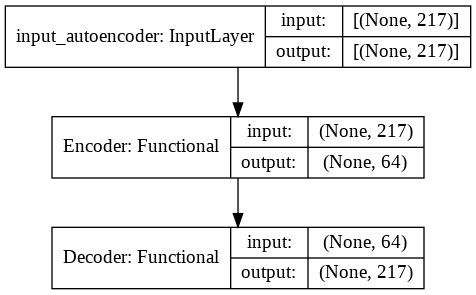

In [ ]:
plot_model(autoencoder, show_shapes=True)

In [ ]:
#autoencoder =load_model('autoencoder_weights_3.h5') 
sgd = SGD(lr=0.01, momentum=0.9)
autoencoder.compile(optimizer=sgd, loss='mae')


In [ ]:

history = autoencoder.fit(train_transaction.iloc[ :8000 ,:], train_transaction.iloc[ :8000 ,:],
                          batch_size = 128, validation_split = 0.2, epochs= 100, verbose=1, callbacks=[es , lrr])


Epoch 1/100
50/50 [==============================] - 2s 23ms/step - loss: 0.4370 - val_loss: 0.4414
Epoch 2/100
50/50 [==============================] - 1s 10ms/step - loss: 0.4196 - val_loss: 0.4354
Epoch 3/100
50/50 [==============================] - 1s 10ms/step - loss: 0.3943 - val_loss: 0.4235
Epoch 4/100
50/50 [==============================] - 1s 14ms/step - loss: 0.3523 - val_loss: 0.3983
Epoch 5/100
50/50 [==============================] - 1s 10ms/step - loss: 0.2783 - val_loss: 0.3328
Epoch 6/100
50/50 [==============================] - 1s 11ms/step - loss: 0.1672 - val_loss: 0.2089
Epoch 7/100
50/50 [==============================] - 1s 10ms/step - loss: 0.0818 - val_loss: 0.1185
Epoch 8/100
50/50 [==============================] - 1s 10ms/step - loss: 0.0523 - val_loss: 0.0755
Epoch 9/100
50/50 [==============================] - 1s 10ms/step - loss: 0.0420 - val_loss: 0.0535
Epoch 10/100
50/50 [==============================] - 1s 10ms/step - loss: 0.0373 - val_loss: 0.0407

In [ ]:
autoencoder.save_weights('autoencoder_weights_3.h5') 
autoencoder.save('autoencoder_model_3.h5')       

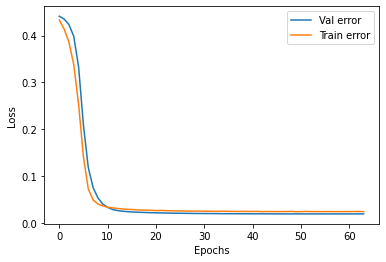

In [ ]:

val_loss = history.history['val_loss']
loss = history.history['loss']
plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
plt.savefig('autoencoder_plot_error.png')
plt.show()


In [ ]:
input_model = Input(64,name = 'input_layer')

classifier = Dense(256, activation='relu')(input_model) 
classifier = Dense(256, activation='relu')(classifier)
classifier = Dense(256, activation='relu')(classifier)
classifier = Dense(128, activation='relu')(classifier)
classifier = Dense(128, activation='relu')(classifier)   
classifier = Dense(64, activation='relu')(classifier)
classifier = Dense(64, activation='relu')(classifier)
classifier = Dense(32, activation='relu')(classifier)
classifier = Dense(32, activation='relu')(classifier)   
classifier = Dense(16, activation='relu')(classifier)    
output = Dense(2, activation='softmax')(classifier)

classifier = Model(inputs= [input_model], outputs=[output])
classifier.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 64)]              0         
_________________________________________________________________
dense (Dense)                (None, 256)               16640     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256  

In [ ]:
#classifier =load_model('classifier_model_3.h5') 
sgd = SGD(lr=0.01, momentum=0.9)
classifier.compile(optimizer=sgd, loss='mae' , metrics = ['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_loss',
                   mode='auto',
                   verbose=1,
                   patience=8)

lrr= ReduceLROnPlateau(monitor='val_loss',
                       factor=0.1, 
                       patience=2, 
                       min_lr=1e-10)

In [ ]:

latent_vector = Encoder.predict(train_transaction[:8000])
history = classifier.fit(latent_vector ,to_categorical(train_label[:8000]),
               batch_size = 128,
               validation_split = 0.2,
               epochs= 100,
               verbose=1,
               callbacks=[es , lrr]
               )

Epoch 1/100
50/50 [==============================] - 1s 12ms/step - loss: 0.2975 - accuracy: 0.9776 - val_loss: 0.0188 - val_accuracy: 0.9812
Epoch 2/100
50/50 [==============================] - 0s 9ms/step - loss: 0.0262 - accuracy: 0.9738 - val_loss: 0.0188 - val_accuracy: 0.9812
Epoch 3/100
50/50 [==============================] - 0s 8ms/step - loss: 0.0272 - accuracy: 0.9728 - val_loss: 0.0188 - val_accuracy: 0.9812
Epoch 4/100
50/50 [==============================] - 0s 9ms/step - loss: 0.0232 - accuracy: 0.9768 - val_loss: 0.0188 - val_accuracy: 0.9812
Epoch 5/100
50/50 [==============================] - 0s 9ms/step - loss: 0.0227 - accuracy: 0.9773 - val_loss: 0.0188 - val_accuracy: 0.9812
Epoch 6/100
50/50 [==============================] - 0s 8ms/step - loss: 0.0240 - accuracy: 0.9760 - val_loss: 0.0188 - val_accuracy: 0.9812
Epoch 7/100
50/50 [==============================] - 0s 9ms/step - loss: 0.0237 - accuracy: 0.9763 - val_loss: 0.0188 - val_accuracy: 0.9812
Epoch 8/100


In [ ]:
classifier.save_weights('classifier_weights_3.h5') 
classifier.save('classifier_model_3.h5')   

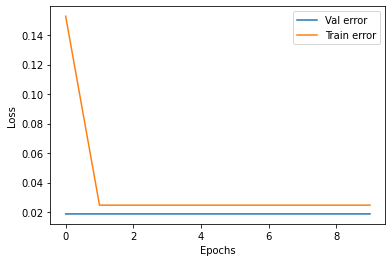

In [ ]:
val_loss = history.history['val_loss']
loss = history.history['loss']

plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
#plt.savefig('classifier_plot_error.png')
plt.show()

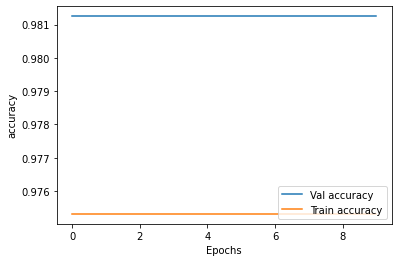

In [ ]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

plt.plot(val_accuracy)
plt.plot(accuracy)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Val accuracy','Train accuracy'], loc='lower right')
#plt.savefig( 'classifier_plot_accuracy.png')
plt.show()

In [ ]:
predicted_latent_vector= Encoder.predict(test_transaction)

In [ ]:
predicted = classifier.predict(predicted_latent_vector)